# importing

In [1]:
from sklearn import datasets
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans

# Load data

* iris is not exactly for a unsupervised model since the target is given but lets assume the target is not there and go ahead

In [3]:
iris = datasets.load_iris()

x = iris.data[:,:2]
y = iris.target

# FInd the right number of clusters

### using dendrogam

* options for method:
 * methods=['single','complete','average','centroid','median','ward','weighted']
 
* options for metric:
 * metrics=[customFunctions]
 * e.g.
     
        def dist3(x,y):
            '''absolute distance'''
            return abs(x[0]-y[0])+abs(x[1]-y[1])

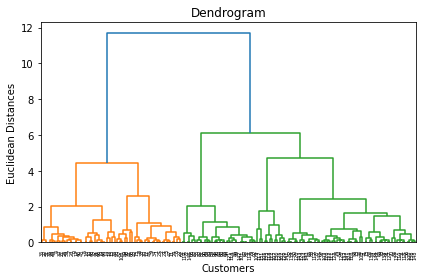

In [8]:
import scipy.cluster.hierarchy as sch

dendrogram = sch.dendrogram(sch.linkage(x, method = 'ward',metric='euclidean'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distances')
plt.tight_layout()

### using elbow method (on inertia)

* sleect the first lower elbow

In [5]:
sse = []
for K in range(1, 10):
    model = KMeans(n_clusters=K)
    model.fit(x)
    sse.append(model.inertia_)

In [6]:
sse

[130.4752666666667,
 58.204092789066756,
 37.0507021276596,
 28.034982153246226,
 21.049430775603195,
 17.407916182733246,
 14.818812058040002,
 12.965335373279753,
 11.110947537969277]

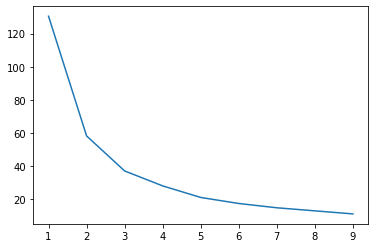

In [7]:
plt.plot(list(range(1,10)),sse)

### using elbow method (using anova)

* you select the first upper elbow

In [12]:
import scipy.stats as stats

In [13]:
lst_f=[]

#vary number of clusters from 2 to 9
for i in range(2,10):
    print("number of clusters: ",i)
    hc = KMeans(n_clusters=i)
    y_hc=hc.fit_predict(x)
    df=pd.concat([pd.DataFrame(x),pd.DataFrame({'target':y_hc})],axis=1)
    print("following contains 3 entries of the data and the newly found out target:")
    print(df.head(3))
    # from groups of the values given by the target, i.e. clusters
    grp=df.groupby('target')
    #create a list to store the data for each cluster
    lst=[]
    for i, v in grp.groups.items():
        print("storing values of cluster number: ",i)
        lst.append(v)
    
    # store the overall measure of the clustered data, it measures how wee the data is separated
    fvalue,pvalue=stats.f_oneway(*lst)
    lst_f.append(fvalue)
    print("\n")

number of clusters:  2
following contains 3 entries of the data and the newly found out target:
     0    1  target
0  5.1  3.5       1
1  4.9  3.0       1
2  4.7  3.2       1
storing values of cluster number:  0
storing values of cluster number:  1


number of clusters:  3
following contains 3 entries of the data and the newly found out target:
     0    1  target
0  5.1  3.5       0
1  4.9  3.0       0
2  4.7  3.2       0
storing values of cluster number:  0
storing values of cluster number:  1
storing values of cluster number:  2


number of clusters:  4
following contains 3 entries of the data and the newly found out target:
     0    1  target
0  5.1  3.5       2
1  4.9  3.0       1
2  4.7  3.2       1
storing values of cluster number:  0
storing values of cluster number:  1
storing values of cluster number:  2
storing values of cluster number:  3


number of clusters:  5
following contains 3 entries of the data and the newly found out target:
     0    1  target
0  5.1  3.5      

In [14]:
lst_f

[106.97337828493954,
 166.03132834229797,
 86.80238928599614,
 69.79107719023928,
 69.42967386600985,
 57.42937103424968,
 49.01221940315835,
 42.28639448833685]

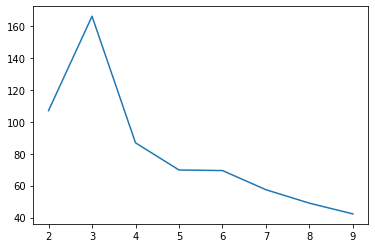

In [15]:
plt.plot(list(range(2,10)),lst_f)

## Conclusion for right number of clusters:

* all the 3 methods are telling us to take 3 as right number of clusters

# Final model

In [17]:
#Initialize the Kmeans model
km = KMeans(n_clusters=3)
#Train the model
km.fit(x)

centers = km.cluster_centers_
print("venters of the clusters: \n",centers)

print("predicted: \n",km.labels_)
print("actual: \n",y)

venters of the clusters: 
 [[5.006      3.428     ]
 [6.81276596 3.07446809]
 [5.77358491 2.69245283]]
predicted: 
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 2 1 2 1 2 1 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2
 1 1 1 1 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 1 1 1 1 2 1 1 1 1
 1 1 2 2 1 1 1 1 2 1 2 1 2 1 1 2 2 1 1 1 1 1 2 2 1 1 1 2 1 1 1 2 1 1 1 2 1
 1 2]
actual: 
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


# Vizualize

Text(0, 0.5, 'Sepal Width')

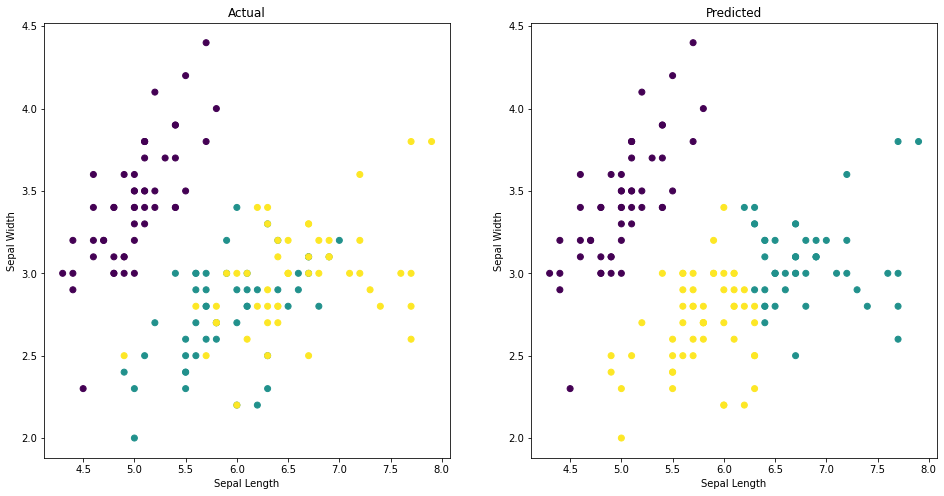

In [18]:
nlabels = km.labels_
fig, axes = plt.subplots(1,2,figsize=(16,8))

axes[0].scatter(x[:,0],x[:,1], c=y)
axes[0].set_title('Actual')
axes[0].set_xlabel('Sepal Length')
axes[0].set_ylabel('Sepal Width')
axes[1].scatter(x[:,0],x[:,1], c= nlabels)
axes[1].set_title('Predicted')
axes[1].set_xlabel('Sepal Length')
axes[1].set_ylabel('Sepal Width')